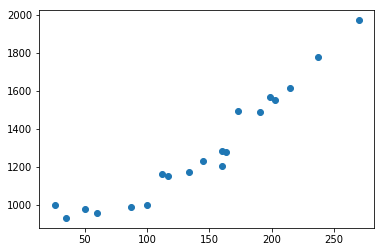

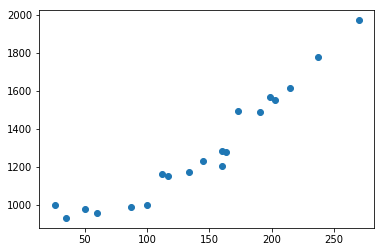

In [1]:
# sales.csvのデータをプロットする

%matplotlib inline
import numpy as np                    # NumPyをインポート
import matplotlib.pyplot as plt       # Matplotlibをインポート

data = np.loadtxt(fname='sales.csv',  # 読み込むファイル名
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
train_x = data[:,0]                   # 1列目の成分をxに代入
train_y = data[:,1]                   # 2列目の成分をyに代入

plt.plot(train_x,                     # x軸に割り当てるデータ
         train_y,                     # y軸に割り当てるデータ
         'o'                          # x,yの交点にドット(丸印)をプロットする
         ) 
plt.show()                            # グラフを表示

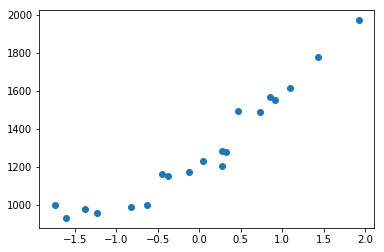

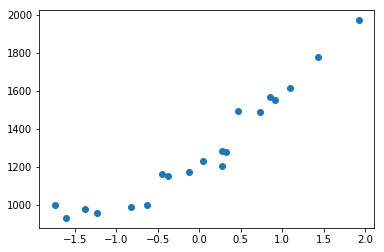

In [2]:
# 標準化の式を実装する

import numpy as np                    # NumPyをインポート
import matplotlib.pyplot as plt       # Matplotlibをインポート

def standardize(x):                   # xは標準化前のデータ
    x_mean = x.mean()                 # 平均値を求める
    std = x.std()                     # 標準偏差を求める
    return (x - x_mean) / std         # 標準化した値を返す

data = np.loadtxt(fname='sales.csv',  # 読み込むファイル
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
x = data[:,0]                         # 1列目の成分をxに代入
y = data[:,1]                         # 2列目の成分をyに代入
standardized_x = standardize(x)

plt.plot(standardized_x,              # x軸に標準化したxを割り当てる
         y,                           # y軸に割り当てるデータ
         'o'                          # ドット(点)をプロットする
         ) 
plt.show()                            # グラフを表示


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def standardize(x):
    '''
        標準化を行う
        x : 標準化前のx
    '''
    x_mean = x.mean()                     # 平均値を求める
    std = x.std()                         # 標準偏差を求める   
    return (x - x_mean) / std             # 標準化した値を返す

def f(x_std, w_0, w_1):
    '''
        回帰直線を求める関数
        x_std : 標準化後のx
        w_0    : パラメーターw0
        w_1    : パラメーターw1
    '''
    # f(x)=w_0 + w_1・xを戻り値として返す
    return w_0 + w_1 * x_std

def E(x_std, y, w_0, w_1):
    '''
        誤差関数
        x_std : 標準化後のx
        y     : yの値
        w_0   : パラメーターθ0
        w_1   : パラメーターθ1
    '''
    return 0.5 * np.sum(
        (y - f(x_std, w_0, w_1)) ** 2
    )

def gradient_method(x_std, y):
    '''
        勾配法で最適化を行う
        x_std : 標準化後のx
        y     : yの値
    '''
    # パラメーターを初期化
    w_0 = np.random.rand()
    w_1 = np.random.rand()
    # 学習率を0.001にセット
    LNR = 1e-3
    # 誤差関数の差分を保持する変数を1で初期化
    difference = 1
    # 更新回数をカウントする変数を1で初期化
    count = 1
    # パラメーターの初期値に誤差関数を適用してbeforeに代入
    err_before = E(x_std, y, # x、yのデータ
                   w_0, w_1  # パラメーターw0、w1
                   )
    # ログの書式
    log = '{}回目: w0 = {:.3f}, w1 = {:.3f}, 差分 = {:.4f}'

    # 誤差の差分が0.01以下になるまで更新を繰り返す
    while difference > 1e-2: # 0.01
        # w_0を更新する
        tmp_w_0 = w_0 - LNR * np.sum(
            (f(x_std, w_0, w_1) - y)
        )
        # w_1を更新する
        tmp_w_1 = w_1 - LNR * np.sum(
            (f(x_std, w_0, w_1) - y)*x_std
        )
        # 更新後のw_0、w_1の値をパラメーター用の変数に代入
        w_0 = tmp_w_0
        w_1 = tmp_w_1
        # 更新後のw0、w1の値で誤差関数の値を求める
        err_after = E(x_std, y, # x、yのデータ
                      w_0, w_1  # 更新後のθ0、θ1
                      )        
        # パラメーター更新前後における誤差の差分を求める
        difference = err_before - err_after
        # パラメーター更新後の誤差をerr_beforeの値にする
        err_before = err_after
        # 最初の1回と以降100回ごとにログを出力
        if (count == 1 or
            count % 100 == 0):
            print(log.format(count, w_0, w_1, difference))
        # カウンター変数の値を1増やす
        count += 1
    # 最後の更新時のログを出力
    print(log.format(count, w_0, w_1, difference))
    # 更新終了後のパラメーターw0、w1の値を戻り値として返す
    return w_0, w_1

In [4]:
# 学習データを読み込む
data = np.loadtxt(fname='sales.csv',  # 読み込むファイル
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
x = data[:,0]                         # 1列目の成分をxに代入
y = data[:,1]                         # 2列目の成分をyに代入
x_std = standardize(x)                # xのすべての要素を標準化

# 勾配法でパラメーターw0、w1の値を求める
w_0, w_1 = gradient_method(x_std, y)

1回目: w0 = 26.004, w1 = 5.949, 差分 = 689983.9642
100回目: w0 = 1119.856, w1 = 239.643, 差分 = 12635.7779
200回目: w0 = 1268.346, w1 = 271.366, 差分 = 222.2374
300回目: w0 = 1288.039, w1 = 275.574, 差分 = 3.9087
400回目: w0 = 1290.651, w1 = 276.132, 差分 = 0.0687
449回目: w0 = 1290.899, w1 = 276.184, 差分 = 0.0099
1回目: w0 = 26.004, w1 = 5.949, 差分 = 689983.9642
100回目: w0 = 1119.856, w1 = 239.643, 差分 = 12635.7779
200回目: w0 = 1268.346, w1 = 271.366, 差分 = 222.2374
300回目: w0 = 1288.039, w1 = 275.574, 差分 = 3.9087
400回目: w0 = 1290.651, w1 = 276.132, 差分 = 0.0687
449回目: w0 = 1290.899, w1 = 276.184, 差分 = 0.0099


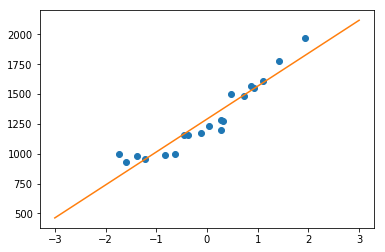

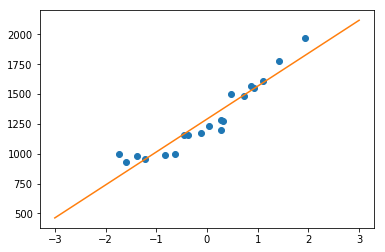

In [5]:
# x軸の値として-3から3までの等差数列を生成
x_axis = np.linspace(start=-3,       # 数列の始点
                     stop=3,         # 数列の終点
                     num=100         # 等差数列の要素数
                     )

# 標準化したxの値とyの値が交差するポイントをプロット
plt.plot(x_std, y, 'o')
# x軸の等差数列に対応するyをf()関数で求め、回帰直線をプロット
plt.plot(x_axis, f(x_axis, w_0, w_1))
# グラフを表示
plt.show()

In [6]:
input_x = input('予測に使用するxの値を入力してください>')
x_mean = x.mean()                  # xの平均値を求める
std = x.std()                      # xの標準偏差を求める
pred = (int(input_x) - x_mean)/std # 入力値を標準化する
print(f(pred, w_0, w_1))           # 予測したyの値を出力

予測に使用するxの値を入力してください>300
1947.0018028688826
1947.0018028688826


In [7]:
# 更新ごとの差分をグラフにする
def gradient_method(x_std, y):
    '''
        勾配法で最適化を行う
        x_std : 標準化後のx
        y     : yの値
    '''
    # 変数の初期化
    w_0 = np.random.rand()
    w_1 = np.random.rand()
    LNR = 1e-3
    difference = 1
    count = 1
    
    # パラメーターの初期値に誤差関数を適用してbeforeに代入
    err_before = E(x_std, y, # x、yのデータ
                   w_0, w_1  # パラメーターw0、w1
                   )
    # ログの書式
    log = '{}回目: w0 = {:.3f}, w1 = {:.3f}, 差分 = {:.4f}'

    differences = []  # 差分を保持する配列
    # 誤差の差分が0.01以下になるまで更新を繰り返す
    while difference > 1e-2: # 0.01
        # w_0を更新
        tmp_w_0 = w_0 - LNR * np.sum(
            (f(x_std, w_0, w_1) - y)
        )
        # w_1を更新
        tmp_w_1 = w_1 - LNR * np.sum(
            (f(x_std, w_0, w_1) - y)*x_std
        )
        # 更新後のw_0、w_1の値をパラメーター用の変数に代入
        w_0 = tmp_w_0
        w_1 = tmp_w_1
        # 更新後のw0、w1の値で誤差関数の値を求める
        err_after = E(x_std, y,
                      w_0, w_1
                      )        
        # パラメーター更新前後における誤差の差分を求める
        difference = err_before - err_after
        # パラメーター更新後の誤差をerr_beforeの値にする
        err_before = err_after
        # 最初の1回と以降100回ごとにログを出力
        if (count == 1 or
            count % 100 == 0):
            print(log.format(count, w_0, w_1, difference))
        # 差分を記録
        differences.append(difference)
        # カウンター変数の値を1増やす
        count += 1
    # 最後の更新時のログを出力
    print(log.format(count, w_0, w_1, difference))

    # 記録された差分の範囲で等差数列を生成
    x_count = np.arange(len(differences))
    # 差分の変化をプロット
    plt.plot(x_count, differences)
    # グラフを表示
    plt.show()

    # 更新終了後のパラメーターw0、w1の値を戻り値として返す
    return w_0, w_1

1回目: w0 = 25.838, w1 = 6.393, 差分 = 690058.7350
100回目: w0 = 1119.834, w1 = 239.703, 差分 = 12637.1472
200回目: w0 = 1268.343, w1 = 271.374, 差分 = 222.26151回目: w0 = 25.838, w1 = 6.393, 差分 = 690058.7350
100回目: w0 = 1119.834, w1 = 239.703, 差分 = 12637.1472
200回目: w0 = 1268.343, w1 = 271.374, 差分 = 222.2615
300回目: w0 = 1288.039, w1 = 275.575, 差分 = 3.9091
400回目: w0 = 1290.651, w1 = 276.132, 差分 = 0.0688
449回目: w0 = 1290.899, w1 = 276.185, 差分 = 0.0099

300回目: w0 = 1288.039, w1 = 275.575, 差分 = 3.9091
400回目: w0 = 1290.651, w1 = 276.132, 差分 = 0.0688
449回目: w0 = 1290.899, w1 = 276.185, 差分 = 0.0099


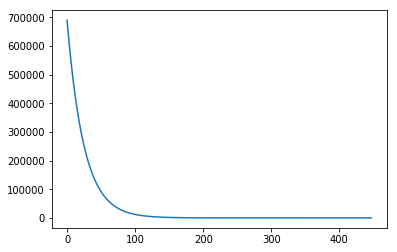

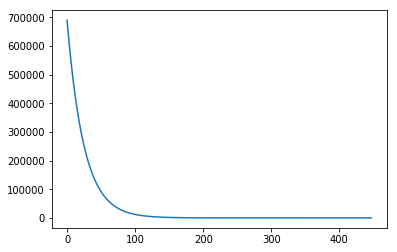

In [8]:
# 学習データを読み込む
data = np.loadtxt(fname='sales.csv',  # 読み込むファイル
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
x = data[:,0]                         # 1列目の成分をxに代入
y = data[:,1]                         # 2列目の成分をyに代入
x_std = standardize(x)                # xのすべての要素を標準化

# 勾配法でパラメーターw0、w1の値を求める
w_0, w_1 = gradient_method(x_std, y)